In [3]:
import pandas as pd

df = pd.read_csv(r"D:\Ashraf\NCI\Data Mining & Machine Learning\Project\Final Datasets\Phishing Dataset\Phishing.csv")
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [4]:
# Number of independent and dependent variables
indep_var = df.columns[:-1]
indep_var_count = len(indep_var)
print('Number of independent variables: ', indep_var_count)

dep_var = df.columns[-1:]
dep_var_count = len(dep_var)
print('Number of dependent variables: ', dep_var_count)

Number of independent variables:  49
Number of dependent variables:  1


In [5]:
df.shape

(10000, 50)

In [6]:
# Number of records
num_records = len(df)
print("Number of records:", num_records)

Number of records: 10000


In [7]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [8]:
df['CLASS_LABEL'] = df['CLASS_LABEL'].astype('category')

In [9]:
df.dtypes

id                                       int64
NumDots                                  int64
SubdomainLevel                           int64
PathLevel                                int64
UrlLength                                int64
NumDash                                  int64
NumDashInHostname                        int64
AtSymbol                                 int64
TildeSymbol                              int64
NumUnderscore                            int64
NumPercent                               int64
NumQueryComponents                       int64
NumAmpersand                             int64
NumHash                                  int64
NumNumericChars                          int64
NoHttps                                  int64
RandomString                             int64
IpAddress                                int64
DomainInSubdomains                       int64
DomainInPaths                            int64
HttpsInHostname                          int64
HostnameLengt

In [10]:
binary_columns = []
nominal_columns = []
categorical_columns = []
textual_columns = []
numerical_columns = []

for column, dtype in df.dtypes.items():
    if dtype == 'bool':
        binary_columns.append(column)
    elif dtype == 'object':
        if len(df[column].unique()) == 2:
            binary_columns.append(column)
        else:
            nominal_columns.append(column)
    elif dtype == 'category':
        categorical_columns.append(column)
    elif dtype == 'float64' or dtype == 'int64':
        numerical_columns.append(column)
    elif dtype == 'string':
        textual_columns.append(column)

print("Binary columns:", binary_columns)
print("\nNominal columns:", nominal_columns)
print("\nCategorical columns:", categorical_columns)
print("\nTextual columns:", textual_columns)
print("\nNumerical columns:", numerical_columns)

Binary columns: []

Nominal columns: []

Categorical columns: ['CLASS_LABEL']

Textual columns: []

Numerical columns: ['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSel

# Data Preprocessing

In [11]:
df.iloc[:,:20].head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1
5,6,3,1,1,42,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,7,2,0,5,60,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
7,8,1,0,3,30,0,0,0,0,0,0,0,0,0,3,1,1,0,0,1
8,9,8,7,2,76,1,1,0,0,0,0,0,0,0,2,1,1,0,1,1
9,10,2,0,2,46,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [12]:
df.iloc[:,20:40].head(10)

,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail
0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000,0,0,0,0,0
1,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000,0,0,0,0,0
2,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000,0,0,0,0,0
3,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000,1,0,0,0,1
4,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000,1,0,0,0,0
5,0,23,12,0,0,0,0,0.100000,1.000000,1,1,0,0,0,0.000,0,0,0,0,0
6,0,17,36,0,0,0,1,0.909091,1.000000,0,1,0,0,0,0.000,1,0,0,0,0
7,0,12,11,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000,0,0,0,0,0
8,0,65,4,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.975,0,0,0,0,0
9,0,14,25,0,0,0,1,1.000000,1.000000,1,1,0,0,0,0.000,1,0,0,0,0


In [13]:
df.iloc[:,40:].head(10)

,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,0,0,1,1,0,1,1,-1,1,1
1,0,0,0,1,-1,1,1,1,1,1
2,0,0,0,1,0,-1,1,-1,0,1
3,0,0,0,1,-1,1,1,1,-1,1
4,1,0,0,1,1,-1,0,-1,-1,1
5,1,1,0,1,1,1,1,-1,1,1
6,0,0,0,1,0,1,1,-1,-1,1
7,0,0,0,1,1,1,1,1,1,1
8,0,0,0,-1,-1,1,1,1,-1,1
9,0,0,0,1,1,1,1,-1,-1,1


In [14]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   id                                  10000 non-null  int64   
 1   NumDots                             10000 non-null  int64   
 2   SubdomainLevel                      10000 non-null  int64   
 3   PathLevel                           10000 non-null  int64   
 4   UrlLength                           10000 non-null  int64   
 5   NumDash                             10000 non-null  int64   
 6   NumDashInHostname                   10000 non-null  int64   
 7   AtSymbol                            10000 non-null  int64   
 8   TildeSymbol                         10000 non-null  int64   
 9   NumUnderscore                       10000 non-null  int64   
 10  NumPercent                          10000 non-null  int64   
 11  NumQueryComponents           

In [15]:
# Summary of each variable
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


In [16]:
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


As per above funtion, there are no missing values in the dataset

In [17]:
# Number of duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [18]:
# Dropping unecessary column
df = df.drop(columns=['id'])
df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

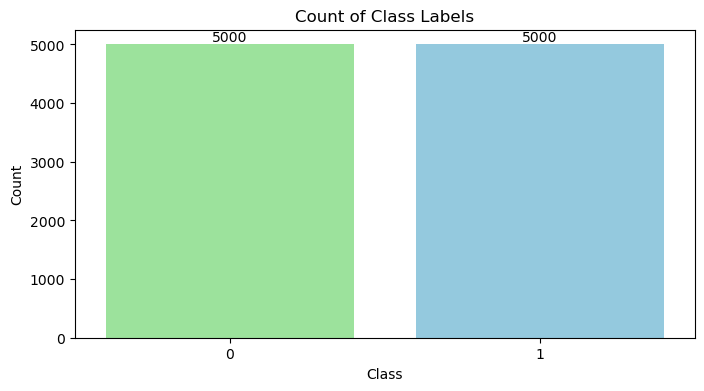

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
ax= sns.countplot(data=df, x='CLASS_LABEL', palette=['lightgreen', 'skyblue'])

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Class Labels')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

In [20]:
# Correlation between each variable
corr1 = df.iloc[:, :20].corr()
corr1

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname
NumDots,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,0.169283,0.255404,0.371642,0.211384,0.024590,-0.064631,0.158447,0.238473,0.009897,NaN
SubdomainLevel,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,-0.029706,-0.031766,-0.018054,0.051744,-0.044628,0.076544,-0.103343,0.522014,-0.019847,NaN
PathLevel,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,-0.140303,-0.104935,0.007947,0.233024,0.058466,0.250091,0.017895,0.014693,0.261468,NaN
UrlLength,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,0.476699,0.466038,0.227029,0.637872,0.036667,0.230698,0.094311,0.120201,0.227722,NaN
NumDash,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,-0.064746,-0.056693,-0.023398,0.121830,0.036594,0.248141,-0.056135,0.056684,0.315989,NaN
NumDashInHostname,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,-0.042379,-0.036415,-0.008395,0.120447,-0.089577,0.073574,-0.033672,0.542477,0.038602,NaN
AtSymbol,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,0.007226,-0.005908,-0.004298,-0.000832,0.004545,0.001844,0.016471,-0.002292,-0.002610,0.008322,NaN
TildeSymbol,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,-0.013665,-0.024903,-0.026223,-0.005532,0.111735,-0.062954,0.009156,0.228278,-0.017360,0.019217,NaN
NumUnderscore,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,0.061638,0.343520,0.279688,-0.002685,0.131965,0.027451,-0.001518,0.101720,-0.029686,0.049452,NaN
NumPercent,0.022616,-0.006003,-0.043529,0.184947,-0.017938,-0.021648,0.007226,-0.013665,0.061638,1.000000,0.129980,0.089819,-0.002340,0.121789,0.012623,-0.009526,-0.015691,-0.016781,-0.030047,NaN


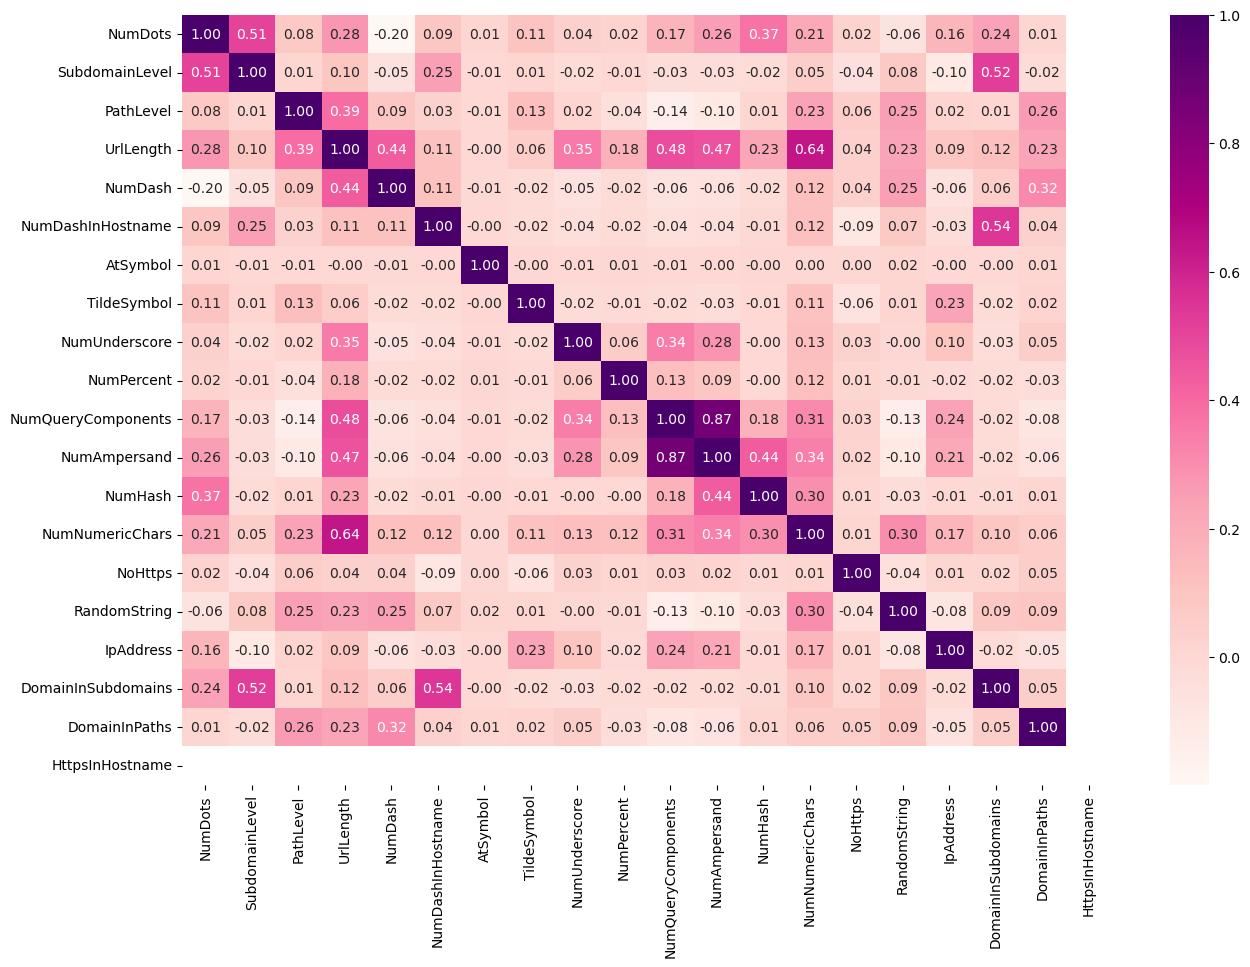

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(corr1, fmt='.2f', cmap='RdPu', annot=True)
plt.show()

In [22]:
corr2 = df.iloc[:, 20:40].corr()
corr2

,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame
HostnameLength,1.000000,-0.039839,-0.068891,0.038452,0.130625,-0.014426,-0.047201,-0.057360,-0.044682,0.002442,0.050052,0.004925,-0.028335,0.235111,-0.013541,-0.012218,0.309951,-0.012420,-0.081902,0.043961
PathLength,-0.039839,1.000000,-0.110432,-0.001639,0.078907,0.073346,-0.025717,0.051224,0.106884,0.006560,0.049060,0.031419,0.030525,-0.044739,-0.084407,-0.003908,0.045726,0.064438,0.081754,0.110973
QueryLength,-0.068891,-0.110432,1.000000,-0.010625,0.180942,-0.032463,-0.086707,-0.094182,-0.012335,-0.011731,0.000130,-0.011894,0.010710,-0.153565,-0.044540,0.027343,-0.028179,-0.012648,0.002552,-0.078914
DoubleSlashInPath,0.038452,-0.001639,-0.010625,1.000000,-0.008897,-0.007386,-0.018222,-0.029257,-0.013448,0.012904,0.013591,-0.010104,0.006893,0.028464,-0.015721,-0.002232,-0.003576,-0.002106,-0.011540,0.013687
NumSensitiveWords,0.130625,0.078907,0.180942,-0.008897,1.000000,0.125755,0.126763,-0.024776,0.101934,0.099788,-0.062635,-0.036116,-0.045348,-0.004827,0.140990,-0.014711,-0.023781,-0.016917,-0.099405,-0.092307
EmbeddedBrandName,-0.014426,0.073346,-0.032463,-0.007386,0.125755,1.000000,0.333344,0.222020,0.101091,0.046412,-0.066808,0.034024,0.009453,-0.065640,0.331398,0.028318,-0.003646,-0.011096,-0.045731,-0.042692
PctExtHyperlinks,-0.047201,-0.025717,-0.086707,-0.018222,0.126763,0.333344,1.000000,0.457578,0.186643,0.120508,-0.169488,0.144827,-0.025772,-0.235334,0.598203,0.016693,-0.034190,0.001038,-0.067086,0.096150
PctExtResourceUrls,-0.057360,0.051224,-0.094182,-0.029257,-0.024776,0.222020,0.457578,1.000000,0.329959,0.045493,-0.046337,0.172565,0.029522,-0.069782,0.526979,0.010508,-0.061053,0.062600,0.007917,0.213052
ExtFavicon,-0.044682,0.106884,-0.012335,-0.013448,0.101934,0.101091,0.186643,0.329959,1.000000,0.046404,0.025526,0.070713,0.027252,-0.019575,0.067166,-0.026075,-0.023740,0.049151,0.008517,0.105926
InsecureForms,0.002442,0.006560,-0.011731,0.012904,0.099788,0.046412,0.120508,0.045493,0.046404,1.000000,0.204639,0.049952,0.101557,0.093503,0.125964,0.009614,0.018390,-0.009298,-0.142389,0.016164


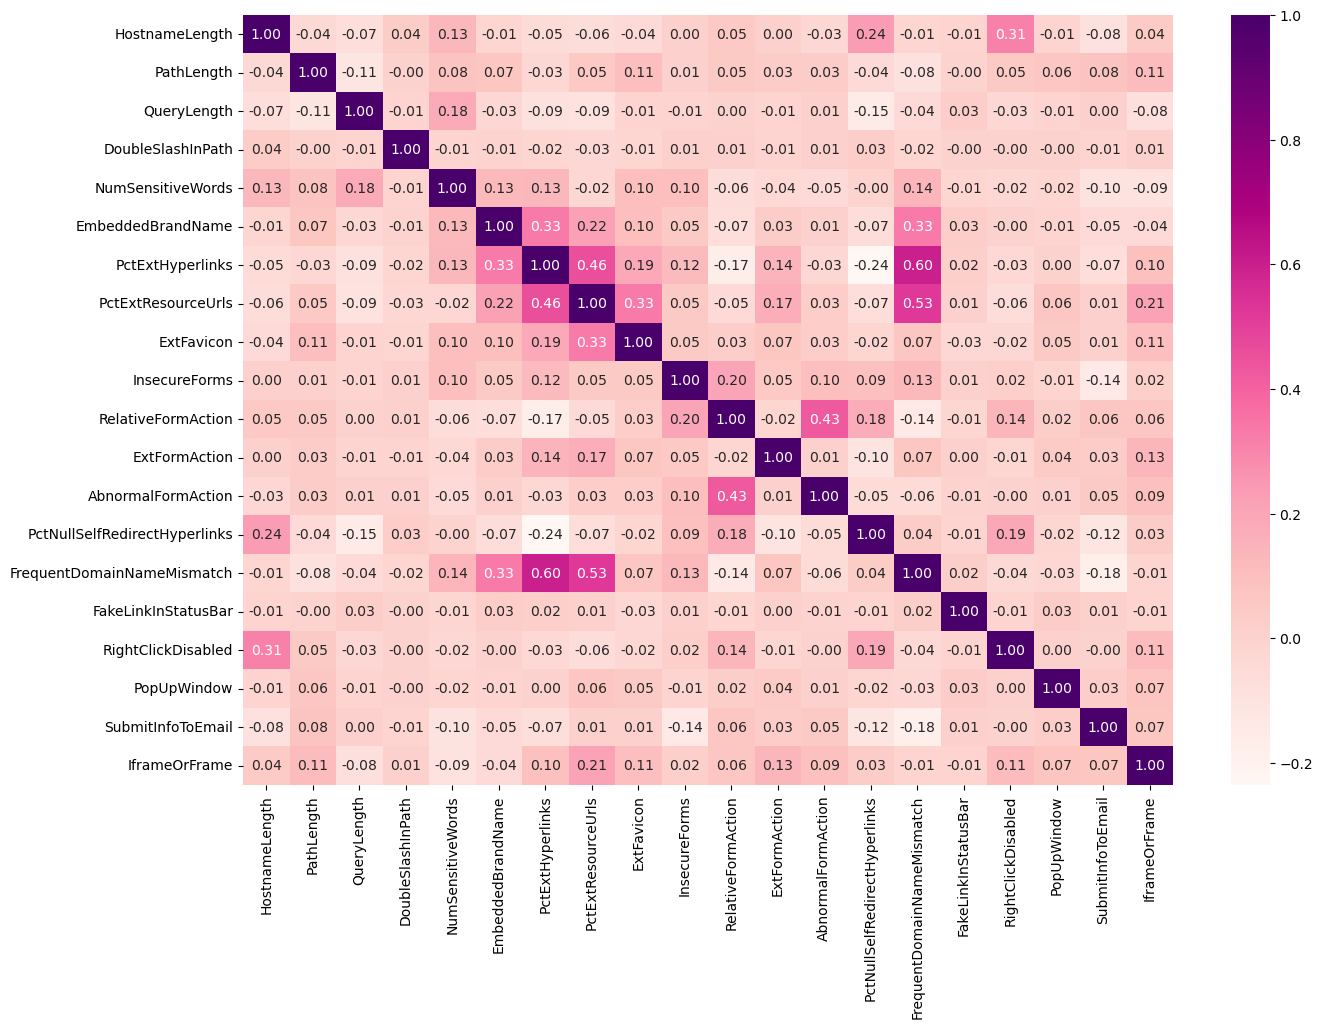

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(corr2, fmt='.2f', cmap='RdPu', annot=True)
plt.show()

In [24]:
corr3 = df.iloc[:, 40:].corr()
corr3

,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
MissingTitle,1.000000,-0.032298,0.009078,0.057681,0.021819,0.039784,0.155284,0.050388,0.116693
ImagesOnlyInForm,-0.032298,1.000000,0.021590,0.031865,0.046261,-0.044868,0.027967,-0.035998,-0.001165
SubdomainLevelRT,0.009078,0.021590,1.000000,0.128709,-0.049745,-0.005998,-0.064951,0.076936,-0.075799
UrlLengthRT,0.057681,0.031865,0.128709,1.000000,0.018197,0.035292,0.005321,-0.155320,0.169513
PctExtResourceUrlsRT,0.021819,0.046261,-0.049745,0.018197,1.000000,0.117606,0.500693,0.200407,0.052089
AbnormalExtFormActionR,0.039784,-0.044868,-0.005998,0.035292,0.117606,1.000000,0.116981,-0.051190,0.185799
ExtMetaScriptLinkRT,0.155284,0.027967,-0.064951,0.005321,0.500693,0.116981,1.000000,0.171166,0.111150
PctExtNullSelfRedirectHyperlinksRT,0.050388,-0.035998,0.076936,-0.155320,0.200407,-0.051190,0.171166,1.000000,-0.540545
CLASS_LABEL,0.116693,-0.001165,-0.075799,0.169513,0.052089,0.185799,0.111150,-0.540545,1.000000


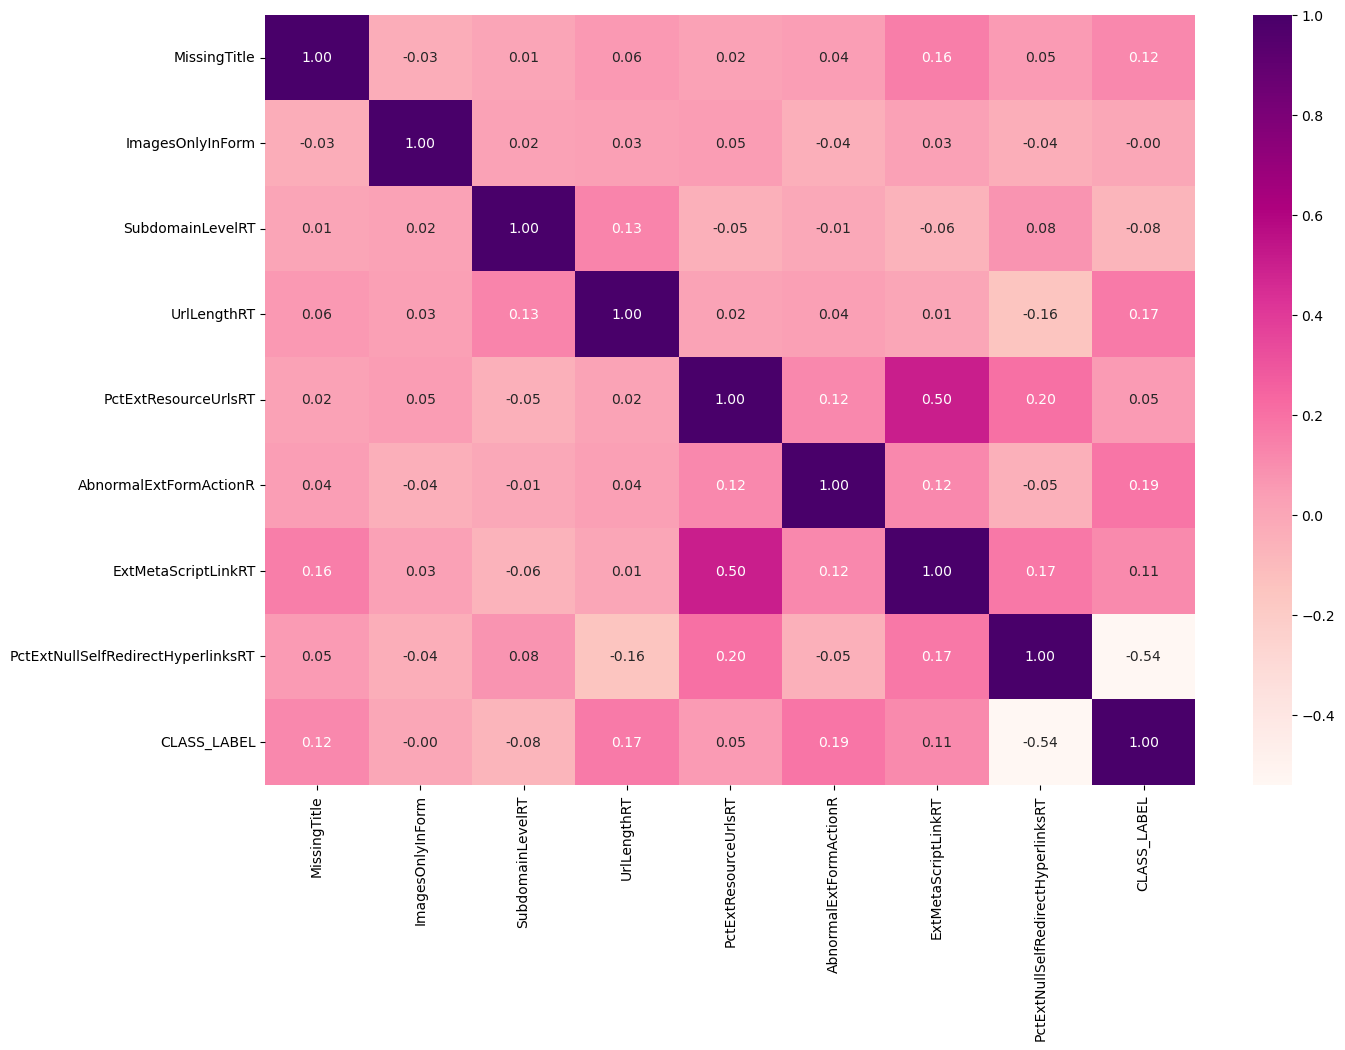

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(corr3, fmt='.2f', cmap='RdPu', annot=True)
plt.show()

In [26]:
df = df.drop(columns=['HttpsInHostname', 'UrlLength', 'DomainInSubdomains', 'FrequentDomainNameMismatch'])
df.shape

(10000, 45)

In [27]:
X = df.drop(columns=['CLASS_LABEL'])
y = df['CLASS_LABEL']

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df = pd.concat([X_scaled_df, y], axis=1)

scaled_df.head(10)

,NumDots,SubdomainLevel,PathLevel,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,0.412023,0.550071,0.912273,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,5.647543,0.174982,-0.024634,0.727558,0.396934,-1.552665,0.763980,1
1,0.412023,0.550071,-0.161179,-0.585299,-0.254528,-0.017323,-0.115212,1.504391,-0.118608,1.146256,...,-0.717101,-0.182404,-0.177068,0.174982,-1.244154,0.727558,0.396934,1.093772,0.763980,1
2,0.412023,0.550071,-0.697905,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,-0.024634,-1.522505,0.396934,-1.552665,-0.349856,1
3,0.412023,0.550071,1.448999,-0.263353,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,-1.244154,0.727558,0.396934,1.093772,-1.463692,1
4,0.412023,-0.781175,0.375547,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,1.394504,-0.182404,-0.177068,0.174982,1.194885,-1.522505,-1.522477,-1.552665,-1.463692,1
5,0.412023,0.550071,-1.234631,-0.263353,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,1.394504,5.482326,-0.177068,0.174982,1.194885,0.727558,0.396934,-1.552665,0.763980,1
6,-0.330495,-0.781175,0.912273,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,-0.024634,0.727558,0.396934,-1.552665,-1.463692,1
7,-1.073013,-0.781175,-0.161179,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,1.194885,0.727558,0.396934,1.093772,0.763980,1
8,4.124613,8.537544,-0.697905,-0.263353,1.577925,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,-7.888718,-1.244154,0.727558,0.396934,1.093772,-1.463692,1
9,-0.330495,-0.781175,-0.697905,-0.585299,-0.254528,-0.017323,-0.115212,-0.289968,-0.118608,-0.341036,...,-0.717101,-0.182404,-0.177068,0.174982,1.194885,0.727558,0.396934,-1.552665,-1.463692,1


In [29]:
scaled_df.shape

(10000, 45)

In [30]:
scaled_df.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInPaths                         0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0
EmbeddedBrandName                     0
PctExtHyperlinks                      0
PctExtResourceUrls                    0


In [35]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

def find_outliers_iqr(df, numerical_columns, threshold=1.5):
    outlier_count = {}
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (threshold * iqr)
        upper_bound = q3 + (threshold * iqr)
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count[col] = len(outliers_col)
    return outlier_count

outlier_count_iqr = find_outliers_iqr(df, numerical_columns)
total_values_per_column = df[numerical_columns].count()
outliers_proportion = {col: outlier_count_iqr[col] / total_values_per_column[col] * 100 for col in numerical_columns}

print("Number of outliers detected using IQR method:")
for col, count in outlier_count_iqr.items():
    print(f"{col}: {count}")
print("\nProportion of outliers in each numerical column (%):")
for col, proportion in outliers_proportion.items():
    print(f"{col}: {proportion:.2f}%")

Number of outliers detected using IQR method:
NumDots: 470
SubdomainLevel: 103
PathLevel: 284
NumDash: 1191
NumDashInHostname: 934
AtSymbol: 3
TildeSymbol: 131
NumUnderscore: 1383
NumPercent: 273
NumQueryComponents: 1866
NumAmpersand: 1025
NumHash: 23
NumNumericChars: 712
NoHttps: 112
RandomString: 0
IpAddress: 172
DomainInPaths: 0
HostnameLength: 323
PathLength: 312
QueryLength: 1987
DoubleSlashInPath: 9
NumSensitiveWords: 911
EmbeddedBrandName: 571
PctExtHyperlinks: 1553
PctExtResourceUrls: 0
ExtFavicon: 1672
InsecureForms: 1560
RelativeFormAction: 2487
ExtFormAction: 1018
AbnormalFormAction: 576
PctNullSelfRedirectHyperlinks: 1658
FakeLinkInStatusBar: 55
RightClickDisabled: 140
PopUpWindow: 49
SubmitInfoToEmail: 1288
IframeOrFrame: 0
MissingTitle: 322
ImagesOnlyInForm: 304
SubdomainLevelRT: 334
UrlLengthRT: 0
PctExtResourceUrlsRT: 0
AbnormalExtFormActionR: 1531
ExtMetaScriptLinkRT: 0
PctExtNullSelfRedirectHyperlinksRT: 0

Proportion of outliers in each numerical column (%):
NumDots:

Outliers are present in this dataset, but removing the outliers results in data loss and affects data integrity.
Prceeding the analysis without removing outliers

In [36]:
# Number of independent and dependent variables
indep_var = scaled_df.columns[:-1]
indep_var_count = len(indep_var)
print('Number of independent variables: ', indep_var_count)

dep_var = scaled_df.columns[-1:]
dep_var_count = len(dep_var)
print('Number of dependent variables: ', dep_var_count)

Number of independent variables:  44
Number of dependent variables:  1


In [37]:
# Number of records
num_records = len(scaled_df)
print("Number of records:", num_records)

Number of records: 10000


In [38]:
binary_columns = []
nominal_columns = []
categorical_columns = []
textual_columns = []
numerical_columns = []

for column, dtype in scaled_df.dtypes.items():
    if dtype == 'bool':
        binary_columns.append(column)
    elif dtype == 'object':
        if len(df[column].unique()) == 2:
            binary_columns.append(column)
        else:
            nominal_columns.append(column)
    elif dtype == 'category':
        categorical_columns.append(column)
    elif dtype == 'float64' or dtype == 'int64':
        numerical_columns.append(column)
    elif dtype == 'string':
        textual_columns.append(column)

print("Binary columns:", binary_columns)
print("\nNominal columns:", nominal_columns)
print("\nCategorical columns:", categorical_columns)
print("\nTextual columns:", textual_columns)
print("\nNumerical columns:", numerical_columns)

Binary columns: []

Nominal columns: []

Categorical columns: ['CLASS_LABEL']

Textual columns: []

Numerical columns: ['NumDots', 'SubdomainLevel', 'PathLevel', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInPaths', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']


In [39]:
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumDots,10000.0,0.000000e+00,1.00005,-1.073013,-0.330495,-0.330495,0.412023,13.777347
SubdomainLevel,10000.0,5.115908e-17,1.00005,-0.781175,-0.781175,0.550071,0.550071,17.856262
PathLevel,10000.0,0.000000e+00,1.00005,-1.771357,-0.697905,-0.161179,0.375547,7.889712
NumDash,10000.0,0.000000e+00,1.00005,-0.585299,-0.585299,-0.585299,0.058594,17.121776
NumDashInHostname,10000.0,3.979039e-17,1.00005,-0.254528,-0.254528,-0.254528,-0.254528,16.237544
AtSymbol,10000.0,9.237056e-18,1.00005,-0.017323,-0.017323,-0.017323,-0.017323,57.726366
TildeSymbol,10000.0,-6.821210e-17,1.00005,-0.115212,-0.115212,-0.115212,-0.115212,8.679624
NumUnderscore,10000.0,1.705303e-17,1.00005,-0.289968,-0.289968,-0.289968,-0.289968,15.859267
NumPercent,10000.0,-2.273737e-17,1.00005,-0.118608,-0.118608,-0.118608,-0.118608,30.417380
NumQueryComponents,10000.0,4.547474e-17,1.00005,-0.341036,-0.341036,-0.341036,-0.341036,16.762829


# Storing Preprocessed data as a CSV File

In [76]:
scaled_df.to_csv('cleaned_phishing.csv', index=False)